In [1]:
import numpy as np
import cartopy.crs as ccrs 
import cartopy.feature as cf
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
from cartopy.mpl.ticker import LatitudeFormatter,LongitudeFormatter
from matplotlib.path import Path
from cartopy.mpl.patch import geos_to_path
plt.rcParams['font.sans-serif']=['KaiTi']

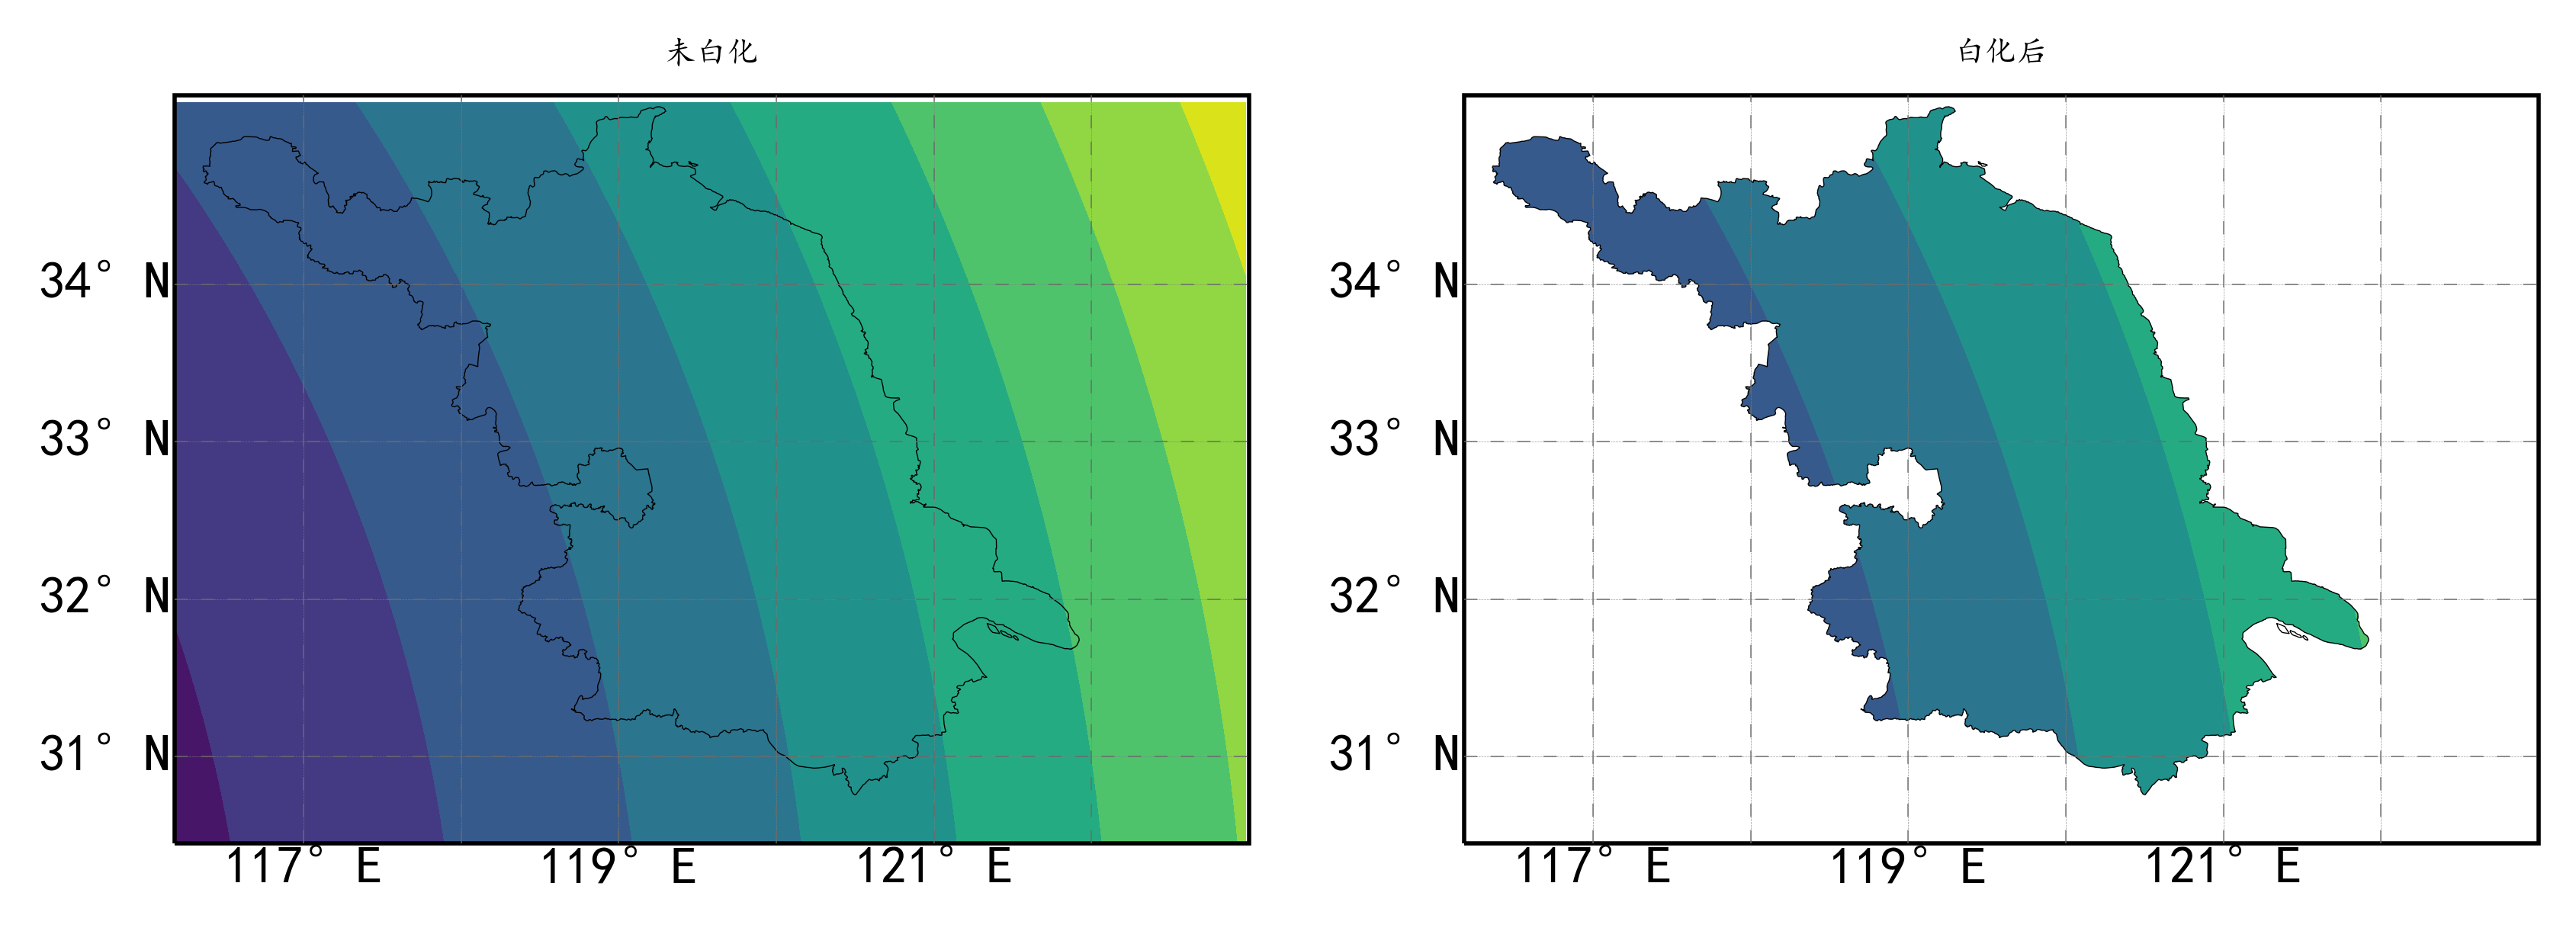

In [7]:
shp_path=r'E:\China_province_shpdata\jiangsu.shp'
shp_data=shpreader.Reader(shp_path)
fig=plt.figure(figsize=(8,6),dpi=500)
ax1=plt.subplot(121,projection=ccrs.PlateCarree())
ax2=plt.subplot(122,projection=ccrs.PlateCarree())
for i,ax in enumerate([ax1,ax2]):
    ax.add_geometries(shp_data.geometries(),crs=ccrs.PlateCarree(),edgecolor='k',facecolor='none',lw=0.2)
    ax.set_extent([116.18,123,30.45,35.20],crs=ccrs.PlateCarree())
    lb=ax.gridlines(draw_labels=None, xlocs=range(116,123,1), ylocs=range(30,35,1), linestyle=(0,(10,10)), linewidth=0.25, color='dimgrey', alpha=0.8, zorder=4)
    lb=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False,xlocs=range(116,123,1), ylocs=range(30,35,1),linewidth=0.1, color='gray', alpha=0.8, linestyle='--' )
    lb.top_labels = None
    lb.right_labels = None
    lb.rotate_labels = False
#     ax.set_xticks(np.arange(116.18,121.57,0.1))
#     ax.set_yticks(np.arange(30.45,35.20,0.1))
#     ax.tick_params(direction='in',labelsize=3,top=True,right=True,length=2,width=0.5)
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    if i==0:
        ax.set_title('未白化',fontsize=6)
    else:
        ax.set_title('白化后',fontsize=6)
########定义绘图数据######################
x=np.arange(116.18,123,0.1)
y=np.arange(30.45,35.20,0.1)
X,Y=np.meshgrid(x,y)
Z=(X-108)**2+(Y-29)**2
#######循环画图#########################
for i,ax in enumerate([ax1,ax2]):
    if i==0:
        ax.contourf(X,Y,Z)
    else:
        ac=ax.contourf(X,Y,Z)
#######获取path#######################
records=shp_data.records()
for record in records:
    path=Path.make_compound_path(*geos_to_path([record.geometry]))
#######白化###########################
for collection in ac.collections:
    collection.set_clip_path(path,transform=ax2.transData)